<a href="https://colab.research.google.com/github/KeshavAman/Loan_Prediction_Model/blob/main/Loan_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')

**Importing Dataset**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/KeshavAman/file/main/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Shape of Dataset**

In [4]:
df.shape

(614, 13)

**Impact of categories in variables**

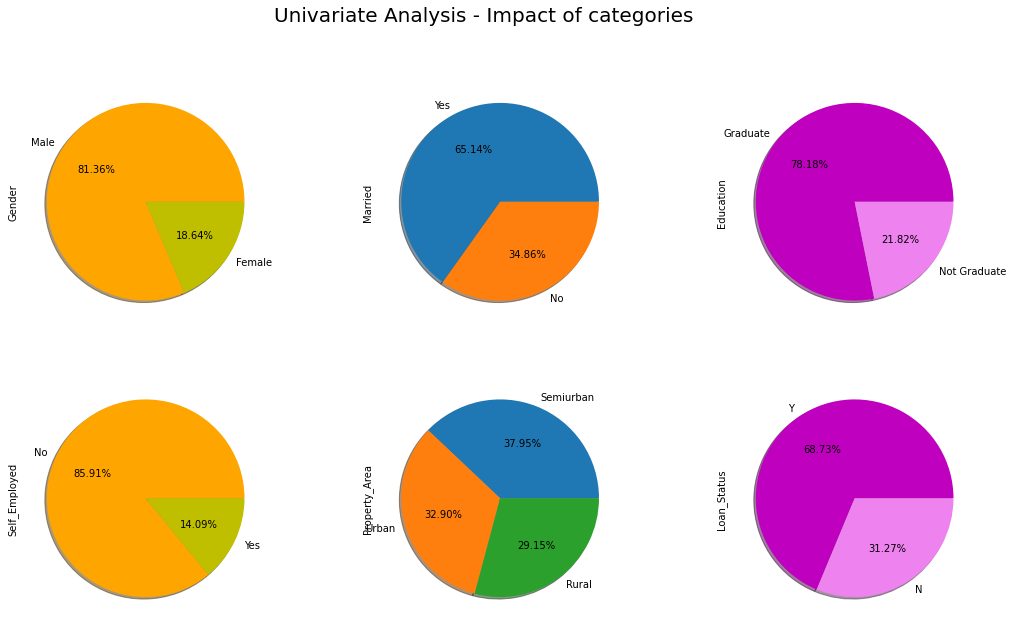

In [5]:
plt.figure(figsize=(18,10))
plt.subplot(231)
df['Gender'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%',colors=['orange','y'])

plt.subplot(232)
df['Married'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.subplot(233)
df['Education'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%',colors=['m','violet'])

plt.subplot(234)
df['Self_Employed'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%',colors=['orange','y'])

plt.subplot(235)
df['Property_Area'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.subplot(236)
df['Loan_Status'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%',colors=['m','violet'])
plt.suptitle('Univariate Analysis - Impact of categories',fontsize = 20)
plt.show()

**Checking Distribution of variables**

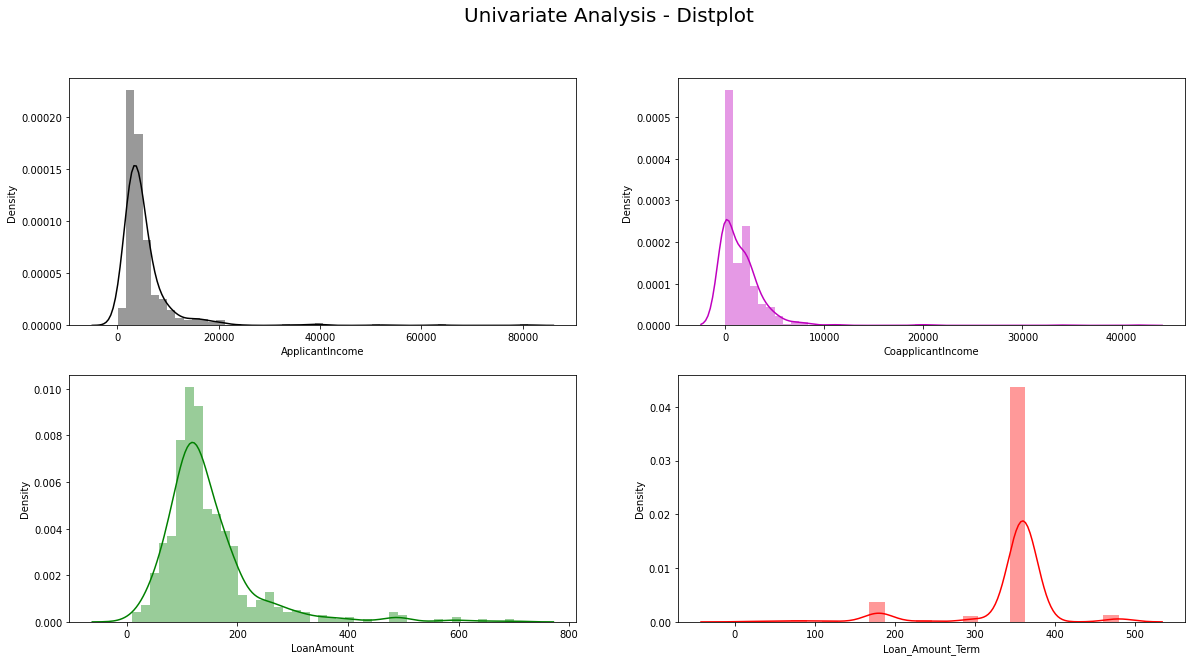

In [6]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.distplot(df['ApplicantIncome'],color='black')

plt.subplot(222)
sns.distplot(df['CoapplicantIncome'],color='m')

plt.subplot(223)
sns.distplot(df['LoanAmount'],color='g')

plt.subplot(224)
sns.distplot(df['Loan_Amount_Term'],color='r')
plt.suptitle('Univariate Analysis - Distplot',fontsize = 20)
plt.show()

**Comparing variables with Loan status**

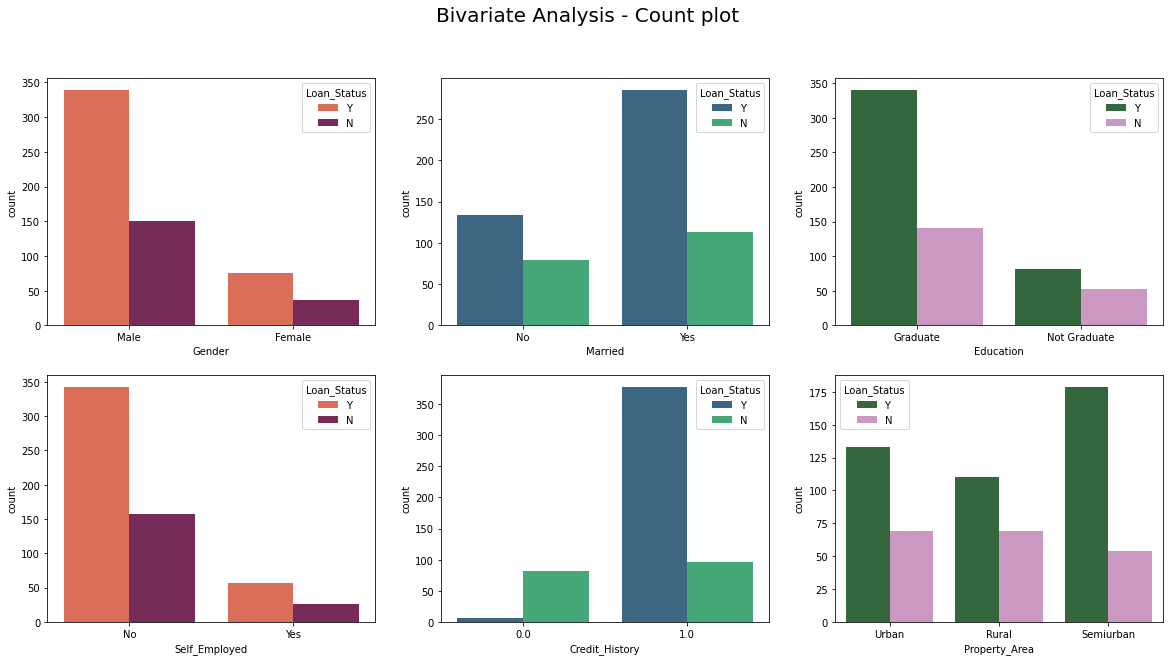

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(231)
sns.countplot(df['Gender'],hue=df['Loan_Status'],palette='rocket_r')

plt.subplot(232)
sns.countplot(df['Married'],hue=df['Loan_Status'],palette='viridis')

plt.subplot(233)
sns.countplot(df['Education'],hue=df['Loan_Status'],palette='cubehelix')

plt.subplot(234)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'],palette='rocket_r')

plt.subplot(235)
sns.countplot(df['Credit_History'],hue=df['Loan_Status'],palette='viridis')

plt.subplot(236)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'],palette='cubehelix')
plt.suptitle('Bivariate Analysis - Count plot',fontsize = 20)
plt.show()

**Removing the outliers from data**

In [8]:
print('Before removing outliers {}'.format(df.shape))
df=df[df['ApplicantIncome']<20000]
df=df[df['CoapplicantIncome']<10000]
df=df[df['LoanAmount']<350]
print('After removing outliers {}'.format(df.shape))

Before removing outliers (614, 13)
After removing outliers (565, 13)


**Checking for null variables in dataset**

In [9]:
df.drop('Loan_ID',axis=1,inplace=True)

In [10]:
df.isnull().sum()

Gender               11
Married               2
Dependents           13
Education             0
Self_Employed        28
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       46
Property_Area         0
Loan_Status           0
dtype: int64

**Assigning values for null values**

In [11]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [12]:
df.isnull().sum().sum()

0

In [13]:
df.select_dtypes(include='object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
5,Male,Yes,2,Graduate,Yes,Urban,Y


**Converting categorical data to numerical data**

In [14]:
df['Gender']=df['Gender'].replace(('Male','Female'),(2,1))
df['Married']=df['Married'].replace(('Yes','No'),(2,1))
df['Education']=df['Education'].replace(('Graduate','Not Graduate'),(2,1))
df['Self_Employed']=df['Self_Employed'].replace(('No','Yes'),(2,1))
df['Property_Area']=df['Property_Area'].replace(('Semiurban','Urban','Rural'),(3,2,1))
df['Dependents']=df['Dependents'].replace(('3+','2','1','0'),(3,2,1,0))
df['Loan_Status']=df['Loan_Status'].replace(('Y','N'),(2,1))

In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,2,2,1,2,2,4583,1508.0,128.0,360.0,1.0,1,1
2,2,2,0,2,1,3000,0.0,66.0,360.0,1.0,2,2
3,2,2,0,1,2,2583,2358.0,120.0,360.0,1.0,2,2
4,2,1,0,2,2,6000,0.0,141.0,360.0,1.0,2,2
5,2,2,2,2,1,5417,4196.0,267.0,360.0,1.0,2,2


**splitting dependent and independent variable**

In [16]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

**Resampling for balancing the data**

In [17]:
sm=SMOTE()
x_sm,y_sm = sm.fit_resample(x,y)

**Visualizing dependent variable**

Before Resampling (565,)
After Resampling (790,)


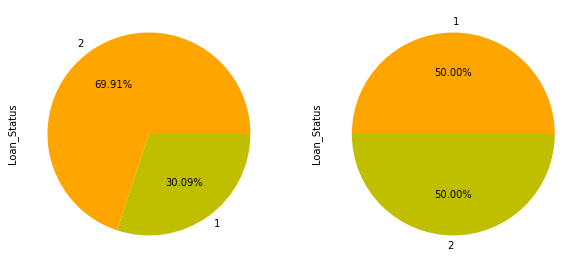

In [19]:
print('Before Resampling {}'.format(y.shape))
print('After Resampling {}'.format(y_sm.shape))
plt.figure(figsize=(10,8))
plt.subplot(121)
y.value_counts().plot(kind='pie',autopct = '%.2f%%',colors=['orange','y'])
plt.subplot(122)
y_sm.value_counts().plot(kind='pie',autopct = '%.2f%%',colors=['orange','y'])
plt.show()

**Splitting test and train data**

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,test_size=0.2,random_state=10)

**Shape after splitting**

In [22]:
print('Shape of xtrain {}'.format(xtrain.shape))
print('Shape of ytrain {}'.format(ytrain.shape))
print('Shape of xtest {}'.format(xtest.shape))
print('Shape of ytest {}'.format(ytest.shape))

Shape of xtrain (632, 11)
Shape of ytrain (632,)
Shape of xtest (158, 11)
Shape of ytest (158,)


**Logistic regression model**

In [23]:
def logistic_reg(xtrain,xtest,ytrain,ytest):
    lr=LogisticRegression(solver='liblinear')
    lr.fit(xtrain,ytrain)
    ypred=lr.predict(xtest)
    print('***LogisticRegression***')
    print('Confusion matrix')
    print(confusion_matrix(ytest,ypred))
    print('Classification report')
    print(classification_report(ytest,ypred))
    print('f1_score : {}'.format(f1_score(ytest,ypred)))

**RandomForestClassifier model**

In [24]:
def random_forest(xtrain,xtest,ytrain,ytest):
    rf=RandomForestClassifier()
    rf.fit(xtrain,ytrain)
    ypred=rf.predict(xtest)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(ytest,ypred))
    print('Classification report')
    print(classification_report(ytest,ypred))
    print('f1_score : {}'.format(f1_score(ytest,ypred)))

**GradientBoostingClassifier model**

In [25]:
def g_boosting(xtrain,xtest,ytrain,ytest):
    gb=GradientBoostingClassifier()
    gb.fit(xtrain,ytrain)
    ypred=gb.predict(xtest)
    print('***GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(ytest,ypred))
    print('Classification report')
    print(classification_report(ytest,ypred))
    print('f1_score : {}'.format(f1_score(ytest,ypred)))

**DecisionTreeClassifierModel**

In [26]:
def d_tree(xtrain,xtest,ytrain,ytest):
    dt=DecisionTreeClassifier()
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(ytest,ypred))
    print('Classification report')
    print(classification_report(ytest,ypred))
    print('f1_score : {}'.format(f1_score(ytest,ypred)))

**Comparing all models**

In [27]:
def compare_model(xtrain,xtest,ytrain,ytest):
    logistic_reg(xtrain,xtest,ytrain,ytest)
    print('-'*100)
    random_forest(xtrain,xtest,ytrain,ytest)
    print('-'*100)
    g_boosting(xtrain,xtest,ytrain,ytest)
    print('-'*100)
    d_tree(xtrain,xtest,ytrain,ytest)

In [28]:
compare_model(xtrain,xtest,ytrain,ytest)

***LogisticRegression***
Confusion matrix
[[64  8]
 [19 67]]
Classification report
              precision    recall  f1-score   support

           1       0.77      0.89      0.83        72
           2       0.89      0.78      0.83        86

    accuracy                           0.83       158
   macro avg       0.83      0.83      0.83       158
weighted avg       0.84      0.83      0.83       158

f1_score : 0.8258064516129032
----------------------------------------------------------------------------------------------------
***RandomForestClassifier***
Confusion matrix
[[65  7]
 [11 75]]
Classification report
              precision    recall  f1-score   support

           1       0.86      0.90      0.88        72
           2       0.91      0.87      0.89        86

    accuracy                           0.89       158
   macro avg       0.88      0.89      0.89       158
weighted avg       0.89      0.89      0.89       158

f1_score : 0.8783783783783783
---------------